In [187]:
%matplotlib inline
import talib
import numpy as np
import pandas as pd
import seaborn as sns
import mpl_finance as mpf #專門用於金融數據的可視化分析的 python模組
import datetime as datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt

import plotly.graph_objects as go

In [188]:
start = datetime.datetime(2020,7,1) #時間調整，從 2020/07/01 ~ 今天
df_2330 = pdr.DataReader('2330.TW','yahoo', start = start)

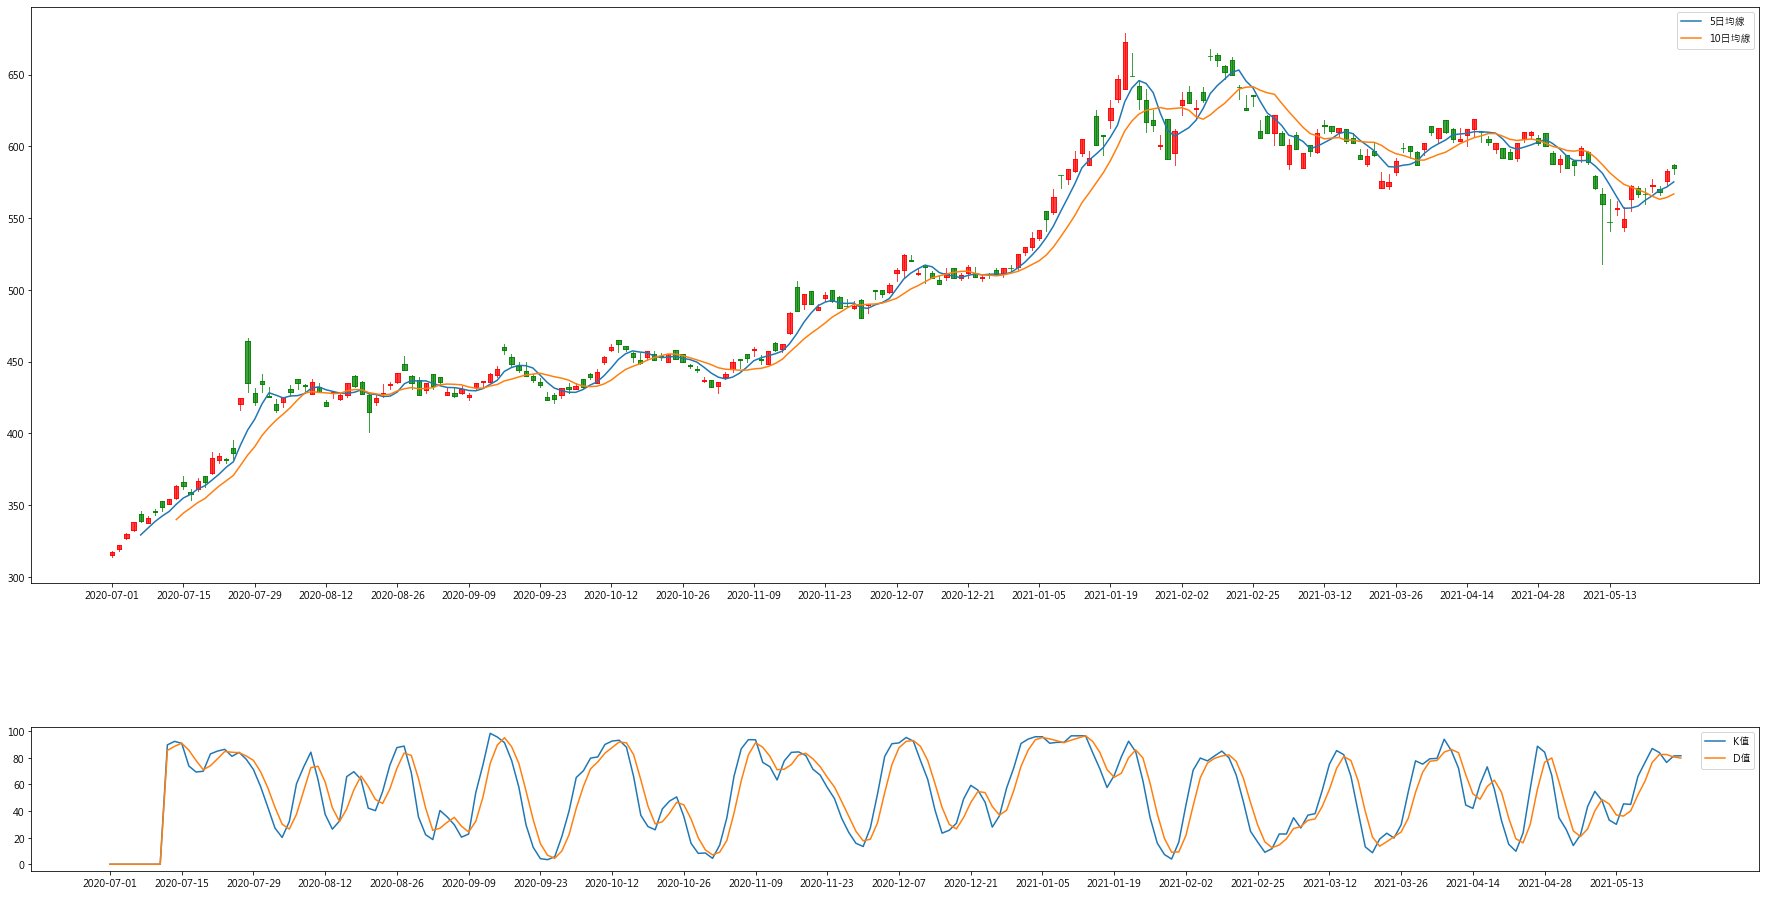

In [189]:
df_2330.index = df_2330.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 

sma_10 = talib.SMA(np.array(df_2330['Close']), 5) # 5日均線
sma_30 = talib.SMA(np.array(df_2330['Close']), 10) # 10日均線
df_2330['k'], df_2330['d'] = talib.STOCH(df_2330['High'], df_2330['Low'], df_2330['Close'])
df_2330['k'].fillna(value=0, inplace=True) #顯示 k線
df_2330['d'].fillna(value=0, inplace=True) #顯示 d線

fig = plt.figure(figsize=(24, 20))
ax = fig.add_axes([0,0.4,1,0.4])
ax2 = fig.add_axes([0,0.2,1,0.1])

ax.set_xticks(range(0, len(df_2330.index), 10))
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],df_2330['Low'], 
                          width=0.6, colorup='r', colordown='g', alpha=0.75)

plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] # 字體
ax.plot(sma_10, label='5日均線') # 劃出 5日均線
ax.plot(sma_30, label='10日均線') # 畫出 10日均線

ax2.plot(df_2330['k'], label='K值')
ax2.plot(df_2330['d'], label='D值')
ax2.set_xticks(range(0, len(df_2330.index), 10))
ax2.set_xticklabels(df_2330.index[::10])

ax.legend();
ax2.legend();